<a href="https://colab.research.google.com/github/heriswaya/MLT-Project-1-and-2/blob/main/forecasting_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**

### **Latar Belakang**
Dalam industri ritel, prediksi permintaan (demand forecasting) merupakan komponen krusial dalam pengambilan keputusan bisnis. Dengan meningkatnya kompleksitas faktor yang memengaruhi permintaan seperti musim, promosi, harga kompetitor, hingga kondisi eksternal seperti pandemi, diperlukan pendekatan berbasis data yang andal dan adaptif.

**Time Series Forecasting** adalah pendekatan yang tepat untuk memahami pola permintaan produk dari waktu ke waktu dan memprediksi tren ke depan. Dengan memahami perilaku permintaan harian, perusahaan dapat merencanakan pengadaan barang, promosi, serta strategi logistik yang lebih efisien.

### **Tujuan Proyek**
Proyek ini bertujuan untuk membangun model **Time Series Forecasting** guna memprediksi permintaan harian (`Demand`) untuk produk tertentu dalam sebuah toko ritel. Pendekatan ini akan membantu dalam memahami pola permintaan berdasarkan data historis serta faktor eksternal seperti cuaca, promosi, dan pandemi.

### **Tentang Dataset**
Dataset ini merupakan hasil modifikasi dari *Retail Store Inventory Forecasting Dataset*. Versi ini telah dikoreksi dari kesalahan ID dan ditambahkan fitur `Epidemic` untuk mensimulasikan kondisi pandemi seperti COVID-19. Dataset ini sangat relevan untuk eksperimen time series karena mencakup fitur-fitur penting:

- Tanggal transaksi (`Date`)
- Informasi produk dan toko
- Tingkat inventaris dan unit terjual
- Faktor eksternal: cuaca, musim, promosi, dan pandemi
- Target: **Demand** harian

## **Import Library**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## **Load Dataset**

In [2]:
# URL file CSV dari GitHub heriswaya (ubah menjadi link raw)
url = 'https://raw.githubusercontent.com/heriswaya/MLT-Project-1-and-2/main/sales_data.csv'

# Load dataset
df = pd.read_csv(url)

# Tampilkan 5 baris pertama
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


## **Exploratory Data Analysis (EDA)**

### Description Variabel

In [3]:
# Tampilkan info awal
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null

In [4]:
# Konversi kolom 'Date' ke datetime
df['Date'] = pd.to_datetime(df['Date'])

# Statistik deskriptif
print("\nDeskripsi Statistik:")
print(df.describe())


Deskripsi Statistik:
                      Date  Inventory Level    Units Sold  Units Ordered  \
count                76000     76000.000000  76000.000000   76000.000000   
mean   2023-01-15 12:00:00       301.062842     88.827316      89.090645   
min    2022-01-01 00:00:00         0.000000      0.000000       0.000000   
25%    2022-07-09 18:00:00       136.000000     58.000000       0.000000   
50%    2023-01-15 12:00:00       227.000000     84.000000       0.000000   
75%    2023-07-24 06:00:00       408.000000    114.000000     121.000000   
max    2024-01-30 00:00:00      2267.000000    426.000000    1616.000000   
std                    NaN       226.510161     43.994525     162.404627   

              Price      Discount     Promotion  Competitor Pricing  \
count  76000.000000  76000.000000  76000.000000        76000.000000   
mean      67.726028      9.087039      0.328947           69.454029   
min        4.740000      0.000000      0.000000            4.290000   
25%      

### Check Missing Value

In [5]:
# Cek missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Price                 0
Discount              0
Weather Condition     0
Promotion             0
Competitor Pricing    0
Seasonality           0
Epidemic              0
Demand                0
dtype: int64


Terlihat bahwa data yang digunakan itu tidak ada missing value, sehingga tidak perlu ada perlakuan dalam bagian ini.

### Check Outliers

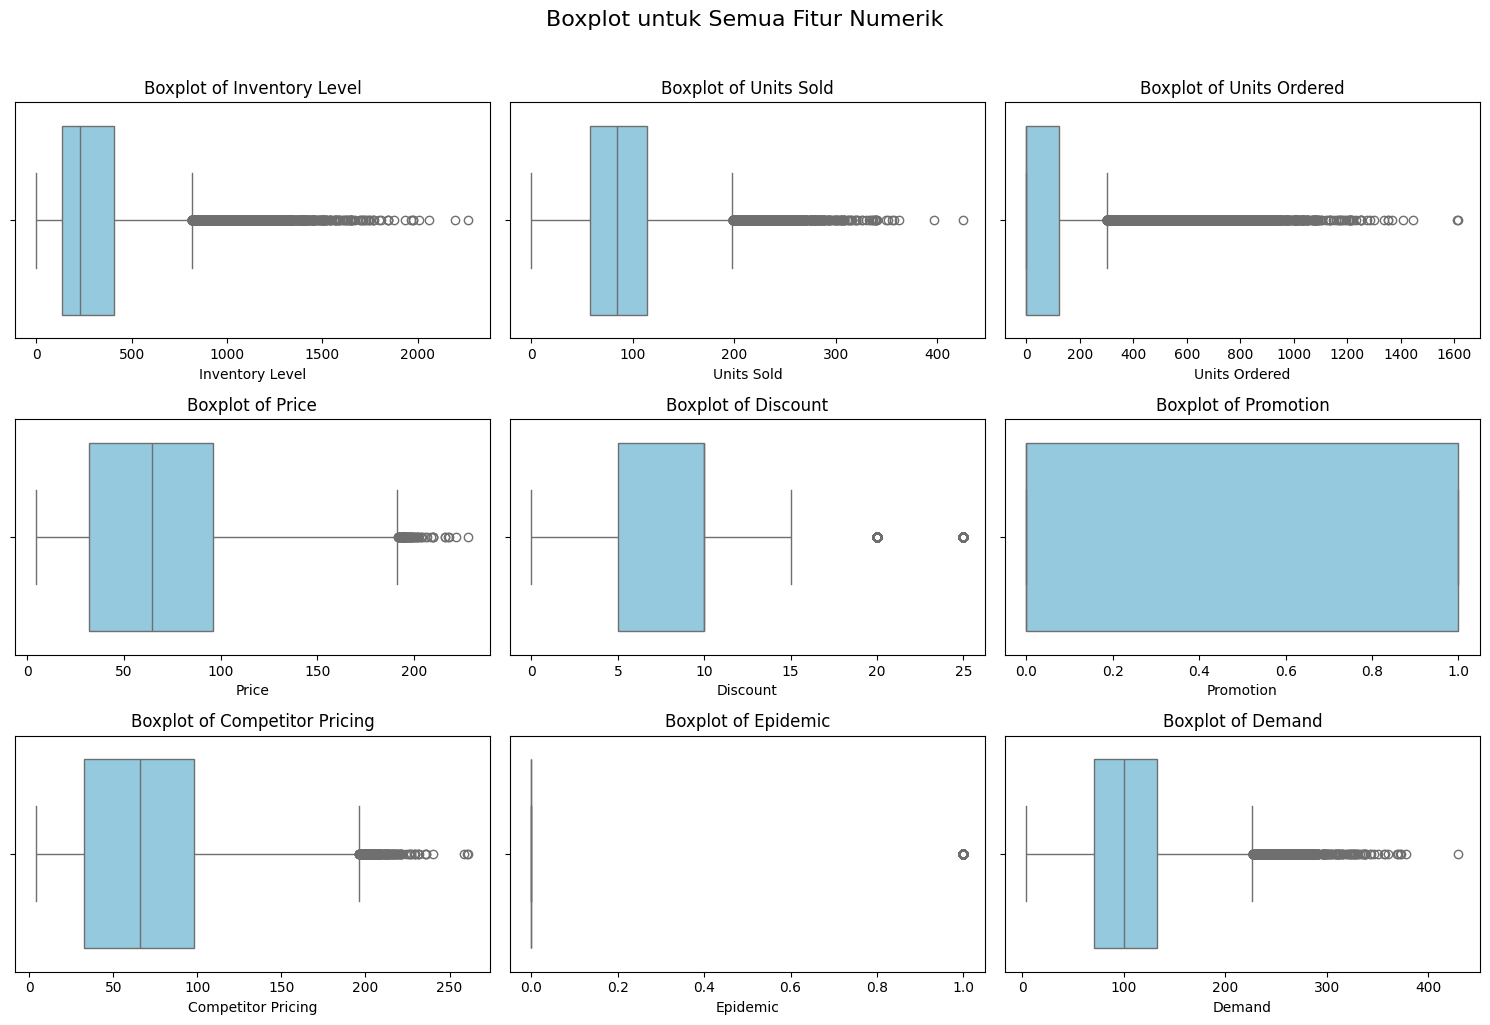

In [6]:
# Pilih hanya kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Buat boxplot untuk setiap fitur numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle('Boxplot untuk Semua Fitur Numerik', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi boxplot terhadap seluruh fitur numerik, terlihat bahwa **hampir semua fitur memiliki outlier**, terutama pada kolom:

* `Inventory Level`
* `Units Sold`
* `Units Ordered`
* `Price`
* `Competitor Pricing`
* `Demand`

Sementara itu, kolom seperti `Discount` memiliki beberapa nilai ekstrem, namun jumlahnya tidak terlalu signifikan. Kolom `Promotion` dan `Epidemic` tidak menunjukkan outlier karena merupakan fitur biner (0/1).

### ✦ Apakah Perlu Ditangani?

Karena proyek ini bertujuan untuk **forecasting time series**, maka pendekatan terhadap outlier berbeda dengan model supervised learning biasa:

* **Tidak semua outlier harus dihapus atau ditangani secara agresif.**
* Dalam konteks forecasting, outlier dapat merepresentasikan **kejadian musiman, promosi besar-besaran, atau kondisi khusus seperti pandemi (COVID-19)**.
* Misalnya, lonjakan `Units Ordered` bisa saja terjadi karena promosi besar (lihat juga fitur `Promotion`) atau pengaruh `Epidemic`.

### ✦ Keputusan:

> **Outlier tidak akan dihapus pada tahap ini**, karena:

1. Mereka bisa mengandung **informasi penting terkait tren musiman atau siklus bisnis**.
2. Data ini digunakan untuk *time series forecasting*, di mana menjaga kontinuitas dan keutuhan data historis sangat krusial.
3. Outlier yang benar-benar anomali akan lebih baik ditangani pada tahap **residual analysis** setelah pemodelan, atau dengan metode robust saat pemodelan.

---

### Univariate Analysis

In [7]:
# Pisahkan fitur numerik dan kategorikal
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Fitur Numerik:", numerical_features)
print("Fitur Kategorikal:", categorical_features)

Fitur Numerik: ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount', 'Promotion', 'Competitor Pricing', 'Epidemic', 'Demand']
Fitur Kategorikal: ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']


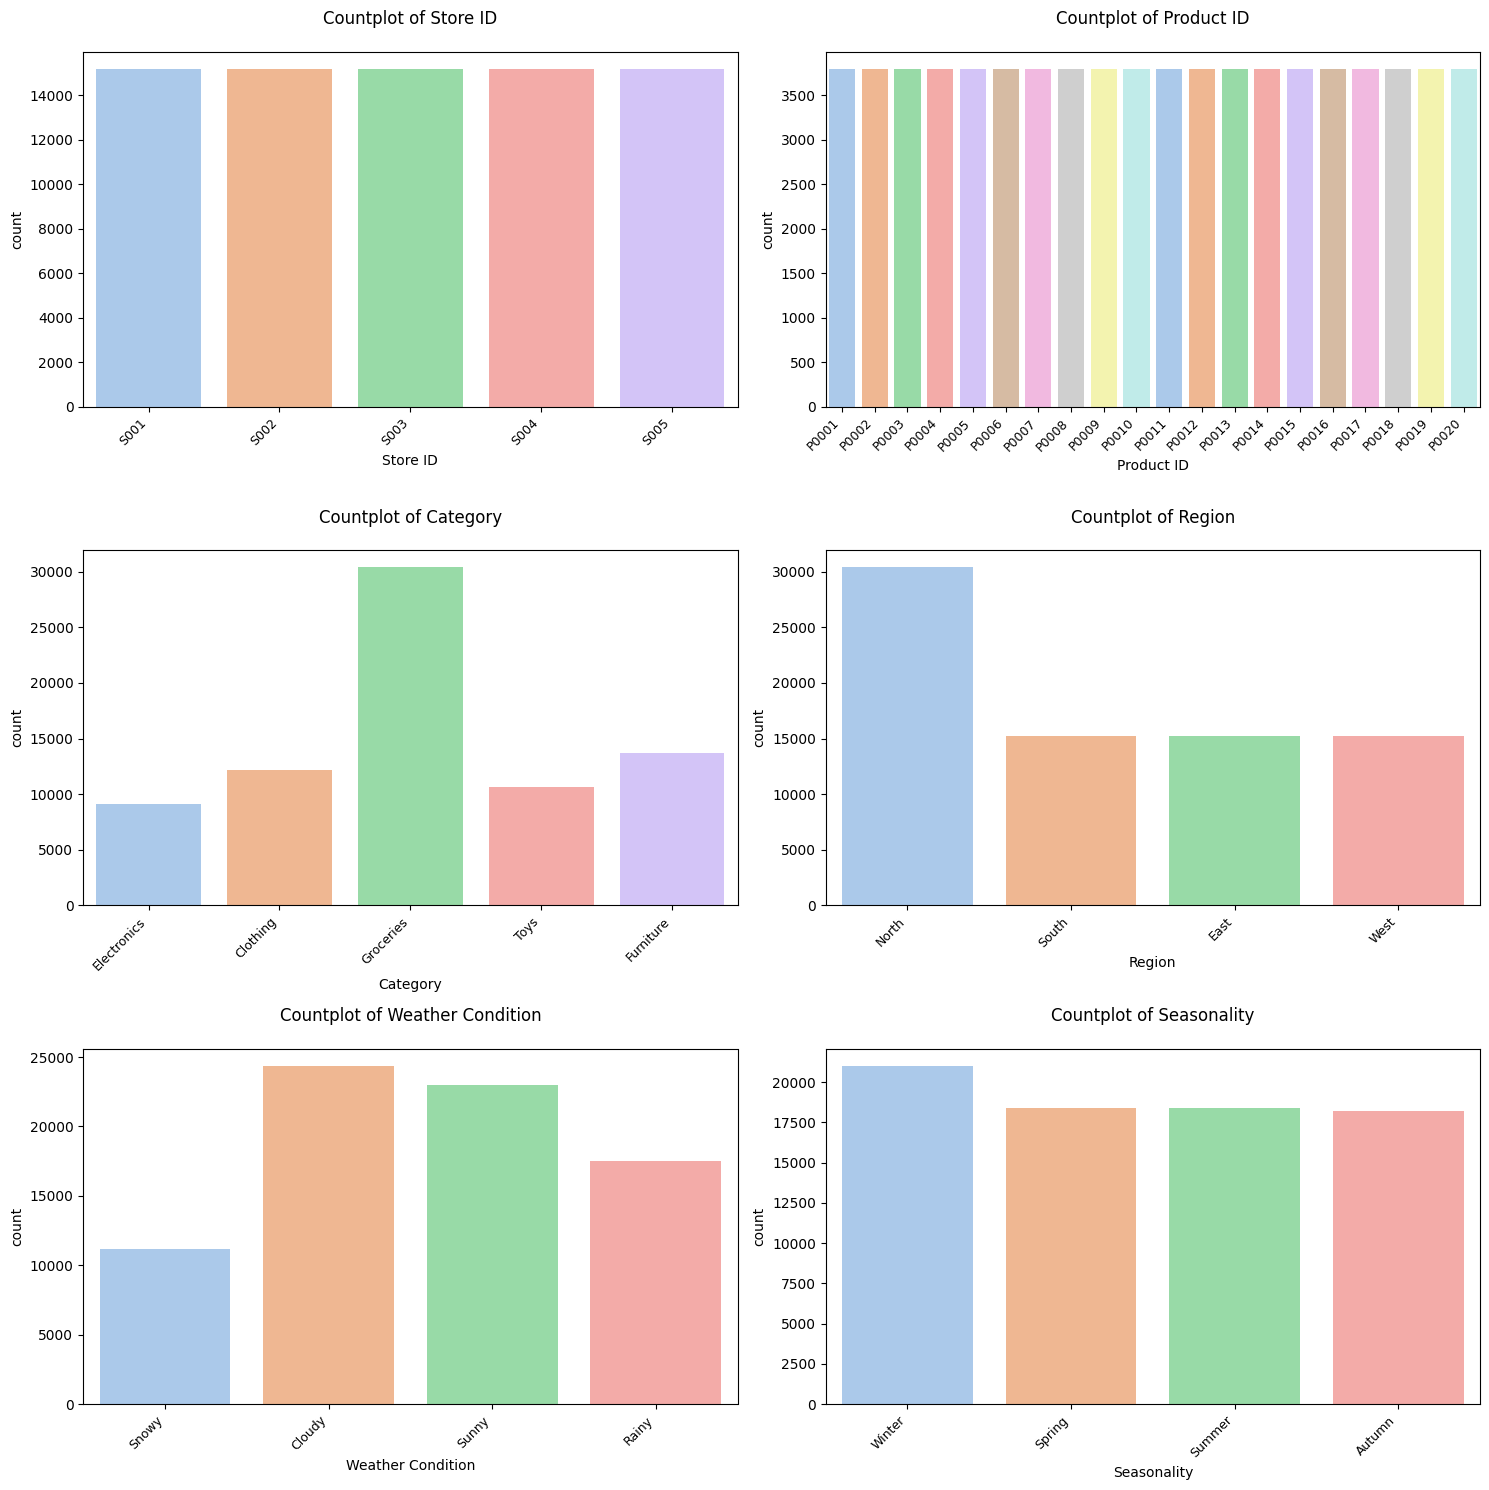

In [17]:
# Visualisasi fitur kategorikal
# Hitung jumlah fitur kategorikal
n_cat = len(categorical_features)
cols = 2  # Jumlah kolom yang diinginkan
rows = (n_cat + cols - 1) // cols  # Hitung jumlah baris yang dibutuhkan

# Buat figure dengan ukuran yang lebih besar
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))

# Atur spacing antar subplot
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten axes jika lebih dari 1 baris
if rows > 1:
    axes = axes.flatten()

# Plot setiap fitur kategorikal
for i, col in enumerate(categorical_features):
    # Buat plot
    sns.countplot(data=df, x=col, palette='pastel', ax=axes[i])

    # Atur title dengan padding
    axes[i].set_title(f'Countplot of {col}', pad=20)

    # Rotasi label x-axis dan atur font size
    axes[i].tick_params(axis='x', rotation=45, labelsize=9)

    # Atur layout untuk mencegah text overlap
    axes[i].set_xticklabels(axes[i].get_xticklabels(),
                           rotation=45,
                           ha='right',
                           fontsize=9)

# Sembunyikan axes yang tidak terpakai
for j in range(i+1, rows*cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

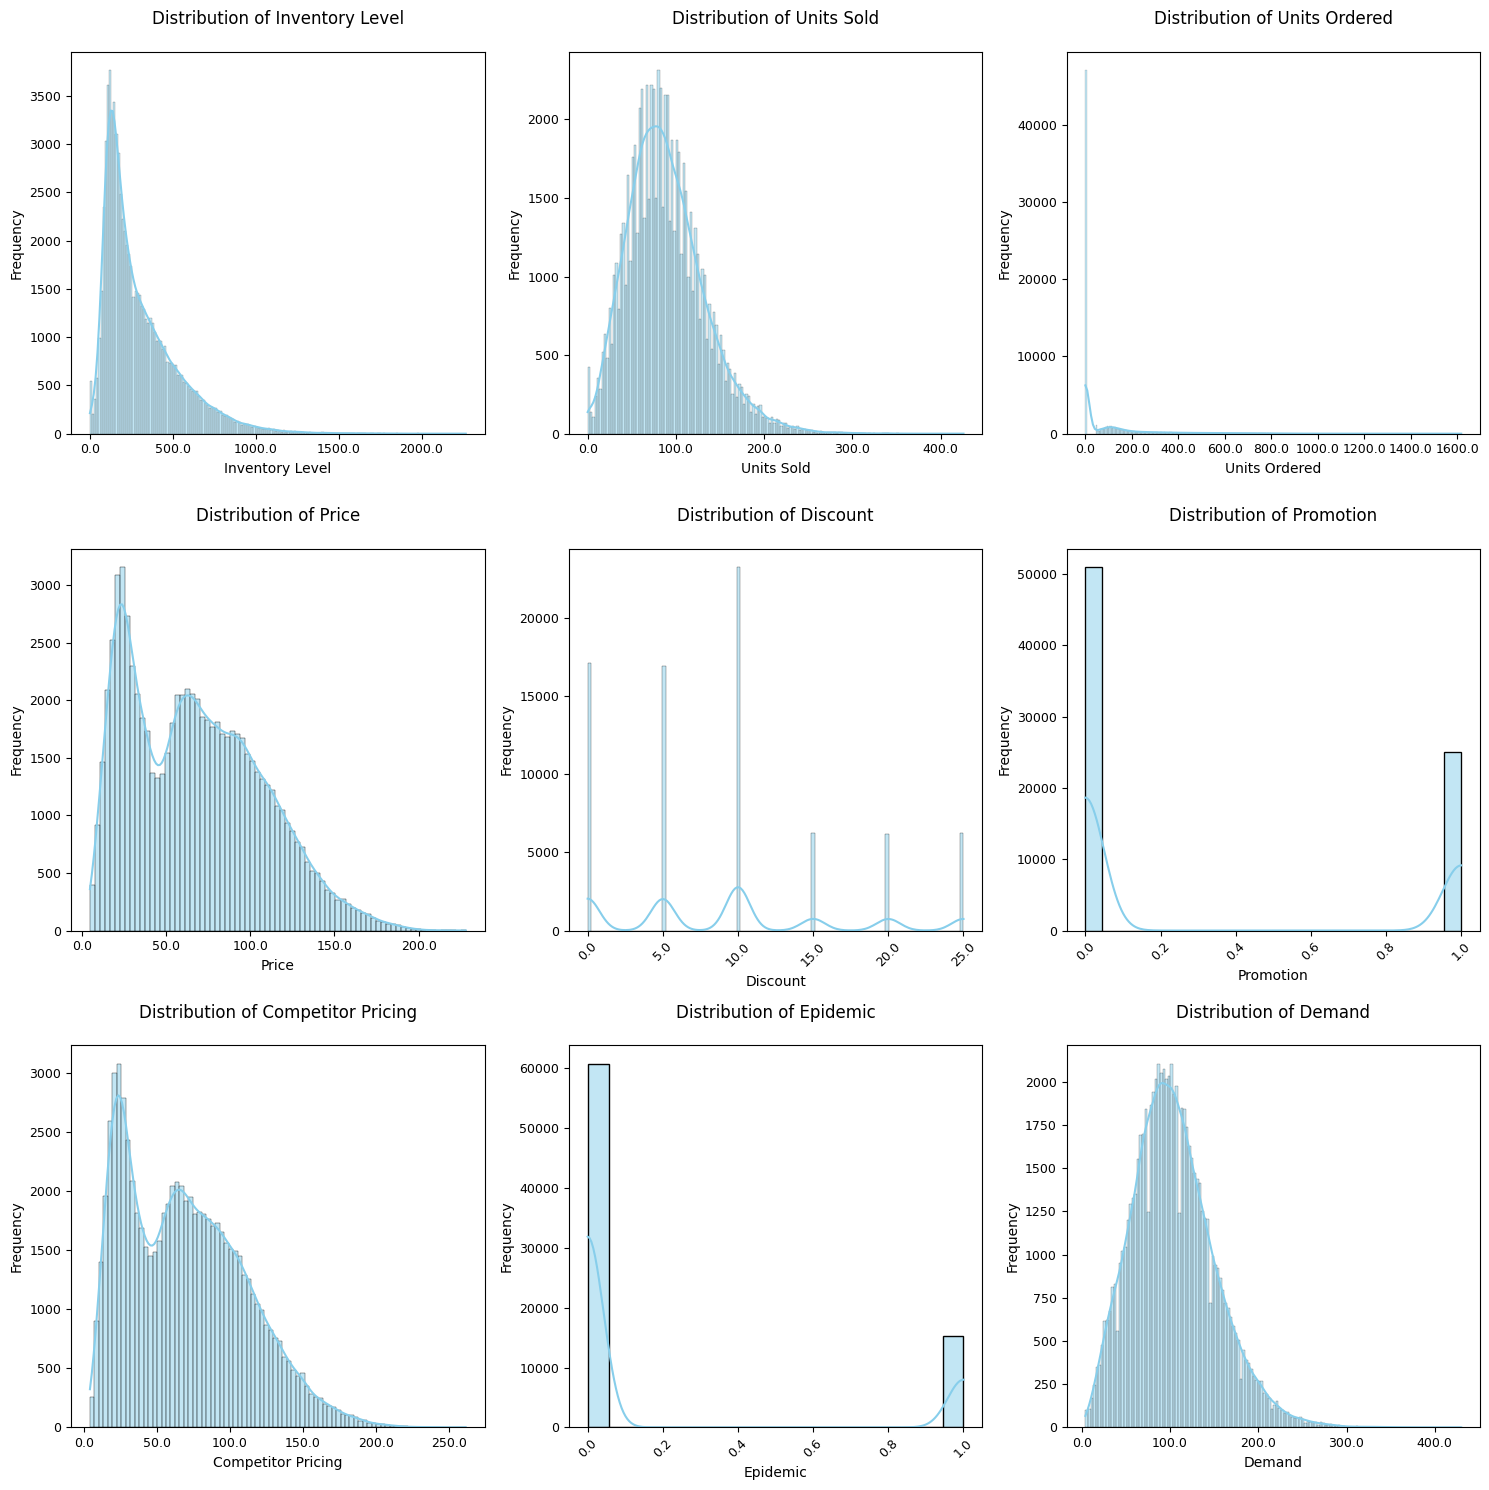

In [20]:
# Visualisasi Fitur Numerik
# Hitung jumlah fitur numerik
n_num = len(numerical_features)
cols = 3  # Jumlah kolom yang diinginkan
rows = (n_num + cols - 1) // cols  # Hitung jumlah baris yang dibutuhkan

# Buat figure dengan ukuran yang disesuaikan
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))

# Atur spacing antar subplot
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten axes jika lebih dari 1 baris
if rows > 1:
    axes = axes.flatten()

# Plot setiap fitur numerik
for i, col in enumerate(numerical_features):
    # Buat histogram dengan KDE
    sns.histplot(df[col], kde=True, color='skyblue', ax=axes[i])

    # Atur title dengan padding
    axes[i].set_title(f'Distribution of {col}', pad=20, fontsize=12)

    # Atur label sumbu x
    axes[i].set_xlabel(col, fontsize=10)

    # Atur label sumbu y
    axes[i].set_ylabel('Frequency', fontsize=10)

    # Atur tick parameters
    axes[i].tick_params(axis='both', which='major', labelsize=9)

    # Format angka pada sumbu jika perlu
    axes[i].xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

    # Rotasi label x jika diperlukan
    if len(df[col].unique()) < 10:  # Jika data diskrit
        axes[i].tick_params(axis='x', rotation=45)

# Sembunyikan axes yang tidak terpakai
for j in range(i+1, rows*cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Univariate analysis bertujuan untuk melihat distribusi masing-masing fitur secara individu.

- Untuk **fitur kategorikal**, digunakan *countplot* untuk melihat frekuensi masing-masing kategori.
- Untuk **fitur numerik**, digunakan *histogram* untuk melihat sebaran nilai, apakah normal, skewed, atau multimodal.

Hasil analisis ini penting untuk memahami karakteristik dasar tiap fitur sebelum dilakukan pemodelan lebih lanjut.


### Multivariate Analysis